# Classification of mnist Datasets

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\hp\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hp\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hp\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hp\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarn

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [23]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

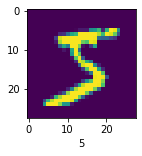

In [5]:
plot_sample(X_train, y_train, 0)

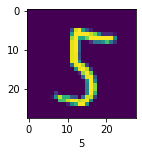

In [6]:
plot_sample(X_train, y_train, 3500)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_train.shape

(60000,)

In [10]:
y_test.shape

(10000,)

In [11]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
# Build Neural Network Model
model = Sequential()

In [14]:
# Add first convolutional layers with 32 filters 3x3 size
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
# Add first maxpooling layers with 2x2 size 
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add second convolutional layers
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Add first maxpooling layers
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
# Add Dense/hidden layer
model.add(Dense(64, activation='relu'))
# Add output layer
model.add(Dense(10, activation = 'softmax'))

In [15]:
# compile the model with adam optimizer
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
# Train the model with 10 epochs
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
60000/60000 [==============================] - 52s 861us/step - loss: 0.1473 - accuracy: 0.9552
Epoch 2/10
60000/60000 [==============================] - 52s 859us/step - loss: 0.0481 - accuracy: 0.9853
Epoch 3/10
60000/60000 [==============================] - 52s 867us/step - loss: 0.0332 - accuracy: 0.9897
Epoch 4/10
60000/60000 [==============================] - 51s 843us/step - loss: 0.0254 - accuracy: 0.9920
Epoch 5/10
60000/60000 [==============================] - 52s 863us/step - loss: 0.0172 - accuracy: 0.9943s - loss: 0.0172 - accura
Epoch 6/10
60000/60000 [==============================] - 51s 847us/step - loss: 0.0138 - accuracy: 0.9956
Epoch 7/10
60000/60000 [==============================] - 51s 850us/step - loss: 0.0106 - accuracy: 0.9965
Epoch 8/10
60000/60000 [==============================] - 51s 850us/step - loss: 0.0095 - accuracy: 0.9970
Epoch 9/10
60000/60000 [==============================] - 48s 806us/step - loss: 0.0081 - accuracy: 0.9974 3s
Epoch 10

In [17]:
# testing accuracy or check overfitting
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 254us/step


[0.03761666052862671, 0.9901000261306763]

In [18]:
# Predict the result
y_pred = model.predict(X_test)
y_pred

array([[1.3855536e-14, 1.5482453e-15, 2.0624532e-11, ..., 9.9999988e-01,
        9.2685798e-13, 1.5305439e-07],
       [2.0896944e-09, 1.3466442e-10, 1.0000000e+00, ..., 3.9317941e-13,
        2.1236194e-12, 1.1001091e-15],
       [3.6958564e-10, 9.9999309e-01, 1.2230378e-09, ..., 6.3638659e-06,
        5.2489003e-08, 1.8138563e-09],
       ...,
       [5.5625001e-18, 1.1904232e-11, 4.2444084e-15, ..., 1.6875801e-09,
        3.4584041e-10, 5.3786840e-11],
       [8.9938755e-15, 6.6222571e-17, 1.2455540e-16, ..., 1.7368209e-19,
        3.1254953e-05, 3.1809294e-13],
       [8.3039062e-11, 1.3411350e-11, 1.7714879e-14, ..., 2.6998826e-18,
        2.1038777e-11, 2.1914222e-13]], dtype=float32)

In [20]:
# Convert into one dimension
import numpy as np
y_classes = [np.argmax(element) for element in y_pred]
y_classes

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 4,
 4,
 2,


In [25]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [31]:
#Print Classification Report
from sklearn.metrics import classification_report
Report = classification_report(y_classes, y_test)
print(Report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       988
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1030
           3       0.99      0.99      0.99      1013
           4       0.98      1.00      0.99       965
           5       0.99      0.98      0.99       900
           6       0.99      0.99      0.99       952
           7       0.99      1.00      0.99      1017
           8       0.99      0.99      0.99       975
           9       0.99      0.98      0.98      1025

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [33]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_classes, y_test)
cm

array([[ 979,    0,    2,    0,    0,    1,    4,    0,    2,    0],
       [   0, 1130,    1,    0,    0,    0,    2,    2,    0,    0],
       [   0,    1, 1021,    0,    0,    0,    0,    5,    3,    0],
       [   0,    1,    2, 1002,    0,    6,    0,    1,    1,    0],
       [   0,    0,    0,    0,  962,    0,    1,    0,    0,    2],
       [   0,    1,    0,    6,    0,  884,    6,    0,    0,    3],
       [   0,    1,    3,    0,    3,    1,  944,    0,    0,    0],
       [   1,    0,    2,    0,    0,    0,    0, 1013,    0,    1],
       [   0,    1,    1,    2,    2,    0,    1,    1,  965,    2],
       [   0,    0,    0,    0,   15,    0,    0,    6,    3, 1001]],
      dtype=int64)

In [36]:
# Accuracy Score
from sklearn.metrics import accuracy_score
score = accuracy_score(y_classes, y_test)
score

0.9901